### Trabalho de Sistemas Distribuidos
#### Aluno: David Marcos

### - Resolução do Problema de network embedding utilizando algoritimos geneticos

### - importando bibliotecas

In [1449]:
from random import sample,randint,random,shuffle
import networkx as nx
import math
from matplotlib import pyplot as plt

### 1 -  passo criar grafo da rede fisica

### criando nos da rede com seus respequitivos valores de cpu

In [1450]:
rd_fisica =  nx.Graph()

rd_fisica.add_nodes_from([

    (0, {"cpu": 60}),
    (1, {"cpu": 70}),
    (2, {"cpu": 65}),
    (3, {"cpu": 70}),
    (4, {"cpu": 65}),

    (5, {"cpu": 52}),
    (6, {"cpu": 83}),
    (7, {"cpu": 99}),
    (8, {"cpu": 88}),
    (9, {"cpu": 98}),
    (10, {"cpu": 70}),
    (11, {"cpu": 50}),

    (12, {"cpu": 88}),
    (13, {"cpu": 98}),
    (14, {"cpu": 70}),
    (15, {"cpu": 50}),
    (16, {"cpu": 50}),
    (17, {"cpu": 90}),
    (18, {"cpu": 90}),
    (19, {"cpu": 95}),
    

])

### definindo as arestas entre os nos com seus respequitivos valores dos links

In [1451]:
"""rd_fisica.add_weighted_edges_from([
    (0,2,30),(0,3,50),(2,1,55),
    (1,4,43),(3,5,70),(3,6,60),
    (5,4,90),(5,6,45),(5,7,57),
    (4,7,66),(6,8,80),(6,9,77),
    (8,7,39),(7,10,48),(9,10,50),
    (8,10,45),(9,8,32),(9,11,32),
    (10,11,45),
    
    
    
    ]
)"""


rd_fisica.add_weighted_edges_from([
    (0,2,30),(0,3,50),(5,0,60),
    (2,1,55),(1,4,43),(3,5,70),
    (3,6,70),(5,2,90),(5,1,60),
    (7,6,60),(5,4,90),(5,6,45),
    (5,7,57),(4,7,66),(6,8,80),
    (6,9,77),(8,7,39),(7,10,48),
    (3,2,50),(8,10,45),(8,12,45),
    (10,11,45),(12,9,77),(10,14,70),
    (10,19,75),(8,19,75),(12,19,70),(11,19,85),
    (3,7,66),(6,12,80),(12,11,77),
    (11,14,39),(10,13,48),(11,10,45),
    (7,13,45),(4,13,72),(14,13,72),
    (8,13,72),(15,13,75),(14,15,66),
    (16,15,90),(16,18,80),(14,18,70),
    (15,18,85),(17,18,80),(9,8,72),
    (17,16,82),(17,14,92),(17,11,62),
       
    ]
)

### plotando mapa da rede fisica 

In [1452]:
def plotar_rede(rd):
    edge_labels = dict([((n1, n2), [rd.get_edge_data(n1,n2)['weight']][0]) for n1, n2 in rd.edges])
    pos = nx.spring_layout(rd)
    plt.figure()

    nx.draw(
        rd, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='blue', alpha=0.9,
        labels={node: node for node in rd.nodes()}
    )
    nx.draw_networkx_edge_labels(
        rd, pos,
        edge_labels=edge_labels,
        font_color='red'
    )


    plt.figure(figsize=(10,6))
    plt.show()

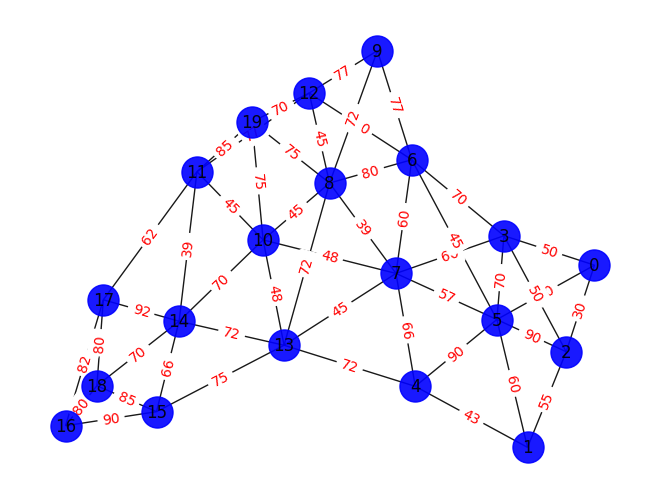

<Figure size 1000x600 with 0 Axes>

In [1453]:
plotar_rede(rd_fisica)

### - definindo uma função de avaliação

In [1454]:
"""
    essa função recebe uma lista de nos que é uma possibilidade de solução
    e faz o mapeamento entre os nos com base nos enlaces da rede virtual,
    essa função retorna uma lista com os enlaces do mapeamento da rede
    virtual na rede fisica.

    obs: se ouver enlaces repetidos no mapeamento ou a quantidade de enlaces mapeados
    for menor que a quantidade de enlaces da rede virtual, quer dizer que não
    é possivel ter um bom mapeamento entre os nos, que atenda a topologia,
    da rede virtual
"""

def mapeamento_dos_nos(lista_nos,rd_virtual):
    map = []
    i = 0
    for edge in rd_virtual.edges():
        caminho = nx.single_source_shortest_path(rd_fisica, lista_nos[edge[0]])
        map.append(caminho[lista_nos[edge[1]]])
        i+=1

        #print(caminho)

    return map

In [1455]:
rd_virtual = nx.Graph()

rd_virtual.add_nodes_from([

    (0, {"cpu": 17}),
    (1, {"cpu": 16}),
    (2, {"cpu": 15}),
    (3, {"cpu": 18}),

    (4, {"cpu": 17}),
    (5, {"cpu": 16}),
    (6, {"cpu": 15}),
    (7, {"cpu": 18}),

])

rd_virtual.add_weighted_edges_from([
    (1,4,14),(2,4,8),(3,4,11),(5,4,14),
    (6,4,11),(7,4,14),(0,4,14)

    ]
)

In [1456]:
#mudançãs feitas aqui

def fitness(lista_nos,rd_fisica,rd_virtual):

    map = mapeamento_dos_nos(lista_nos,rd_virtual)


    lista_enlaces = []
    nos_cobrados = []

    num_enlaces = 0
    pontuacao = 0
    punicao = 2
    total_cpu = 0
    total_enlace = 0
    
    enlaces_virtuais = list(rd_virtual.edges(data=True))

    for enlace in map:
        for i in range(len(enlace)-1):
            
            en = sorted([enlace[i],enlace[i+1]])

            #print(f'(enlace_f:{[((enlace[i],rd_fisica.nodes[enlace[i]]),(enlace[i+1],rd_fisica.nodes[enlace[i+1]])) ,rd_fisica.get_edge_data(enlace[i],enlace[i+1]) ] })'
            #,f'enlace_v: {[((enlaces_virtuais[num_enlaces][0],rd_virtual.nodes[enlaces_virtuais[num_enlaces][0]]),(enlaces_virtuais[num_enlaces][1],rd_virtual.nodes[enlaces_virtuais[num_enlaces][1]])),enlaces_virtuais[num_enlaces][2]]}')
               
            #verifica se a capacidade do enlace atende aos requisitos da rede virtual ou se possui enlaces repetidos no mapeamento
            if  (en in lista_enlaces):
                #se entrar nesse if indica que o mapeamento dos nos é invalido
                punicao += 1000    
            
            if (rd_fisica.get_edge_data(enlace[i],enlace[i+1])['weight'] >=  enlaces_virtuais[num_enlaces][2]['weight']) :

                #subtrai o recurso do enlace virtual na rede fisica e contabiliza o restante do enlace    
                total_enlace+= rd_fisica.get_edge_data(enlace[i],enlace[i+1])['weight'] - enlaces_virtuais[num_enlaces][2]['weight']
            else:
                punicao += 1000
            

            #verifica se o no do enlace ja teve seu recurso de cpu contabilizado
            if enlace[i] not in nos_cobrados:
                '''
                se o no não foi contabilizado, verifica se o recurso de cpu do no atende aos requisitos do seu respequitivo
                no virtual, se possuir é subtraidos o valor do cpu virtual no no fisico e é contabilizado o total de cpu 
                restante do no fisico e o no é adicionado numa lista para indicar que o recurso de cpu ja foi contabilizado 
                '''
                if (rd_fisica.nodes[enlace[i]]['cpu'] >= rd_virtual.nodes[enlaces_virtuais[num_enlaces][0]]['cpu']):    
                    
                    total_cpu += rd_fisica.nodes[enlace[i]]['cpu'] - rd_virtual.nodes[enlaces_virtuais[num_enlaces][0]]['cpu']          
                    
                else:

                    punicao += 1000
                
                nos_cobrados.append(enlace[i])
        
            #faz a mesma operação acima so que com o outro no do enlace               
            if enlace[i+1] not in nos_cobrados:
                if(rd_fisica.nodes[enlace[i+1]]['cpu'] >= rd_virtual.nodes[enlaces_virtuais[num_enlaces][1]]['cpu']):
                    
                    total_cpu += rd_fisica.nodes[enlace[i+1]]['cpu'] - rd_virtual.nodes[enlaces_virtuais[num_enlaces][1]]['cpu']
                else:
                    punicao += 1000 
            
                nos_cobrados.append(enlace[i+1])

            lista_enlaces.append(en)     

        num_enlaces+=1


    """
    calcula a pontuação total do mapeamento, se for maior ou igual a 0 quer dizer que é possivel
    atender a requisição da rede virtual

    pontuação é calculada pelo total de cpu + total do enlace da rede fisica dividido pela
    quantidade de enlaces fisicos mapeados para a rede virtual + quantidade de Nós fisicos mapeados
    para a rede virtual - a punição

    se o enlace ou cpu nao possuir recursos suficientes para atender a rede virtual é acrescentado
    100 de punição, se o mapeamento entre os enlaces for invalido  é acrescentado 1000 de punição que
    será decrementado da pontuação final
    """
    enlaces_mapeados = len(lista_enlaces) - rd_virtual.number_of_edges()
    nos_mapeados = len(nos_cobrados) - rd_virtual.number_of_nodes()

    pontuacao += (total_cpu + total_enlace - punicao) / (pow(enlaces_mapeados + nos_mapeados,3)+1)

    
    return pontuacao

### -Definindo uma função para seleção dos individuos para crossover

In [1457]:
""" 
    Função de seleção de pais com base em torneio,
    essa função seleciona dois individuos da população
    para isso é sorteado 4 individuos aleatorios da população
    e é selecionado o individuo que possui maior aptidão
"""
def tournament_selection(pontuacao, k=4):
    pais = []
    for i in range(2):
        candidatos = sample(pontuacao, k)
        
        melhor = max(candidatos)
        
        pais.append(melhor[1])
    
    return pais

### -Definindo uma função para o cruzamento de individos

In [1458]:
"""
    essa função faz o cruzamento entre dois individuos
    e é gerado um filho, para isso é sorteado um valor
    aleatorio de 0 a 1, se o valor for menor que 0,5 o filho
    recebe um no do pai1 se o valor for maior o filho recebe o 
    um no do pai2

"""
def crossover_uniforme(pai1, pai2):
    filho = []

    for i in range(len(pai1)):
        if random() < 0.5 and (pai1[i] not in(filho)):
            filho.append(pai1[i])
        else:
            if pai2[i] not in filho:
                filho.append(pai2[i])
            else:
                filho.append(pai1[i])
            
    return filho



### -Definindo uma função para mutação de um individuo

In [1459]:
"""
    essa função recebe um individuo e uma probabilidade de mutação
    se a probabilidade for atingida é trocado a posição dos nos
    do individuo
"""
def mutacao(lista_nos, prob_mutacao):
    if random() < prob_mutacao:
        pos1 = randint(0, len(lista_nos)-1)
        pos2 = randint(0, len(lista_nos)-1)

        lista_nos[pos1], lista_nos[pos2] = lista_nos[pos2], lista_nos[pos1]
    
    return lista_nos

### -Definindo uma população inicial

In [1460]:
def gera_populacao(pop_size,rd_virtual):
    """
        para gerar uma população é sorteado nos aleatorios da rede fisica,
        que são possiveis mapeamentos da requisição
    """
    nos_virtuais = len(rd_virtual.nodes)
    pop = []


    while(len(pop) < pop_size):
        nos_sorteados = sample(range(0, len(rd_fisica.nodes)), nos_virtuais)
        if nos_sorteados not in(pop):
            pop.append(nos_sorteados)
        #print(nos_sorteados)
    
    return pop


In [1461]:
def calculo_fitness(populacao,rd_fisica,rd_virtual):
    pontuacao = []
    for i in populacao:
        pontuacao.append([fitness(i,rd_fisica,rd_virtual),i])
    
    return pontuacao

### - Versão com Paralelismo

In [1462]:
from threading import Thread

class ThreadReturn(Thread):
    def __init__(self, group=None, target=None, name=None,
                 args=(), kwargs={}, Verbose=None):
        Thread.__init__(self, group, target, name, args, kwargs)
        self._return = None
        
    def run(self):
        if self._target is not None:
            self._return = self._target(*self._args,
                                                **self._kwargs)
            
    def join(self, *args):
        Thread.join(self, *args)
        return self._return

In [1463]:
def evolucao(pontuacao):
        """
        Evolui a população para uma nova geração, retorna
        a população evoluida.
        """

        new_pop = []
        while len(new_pop) < len(pontuacao):
            
            pais = tournament_selection(pontuacao)

            filho = crossover_uniforme(pais[0],pais[1])
            filho = mutacao(filho,0.10)
    
            if filho not in new_pop and len(filho) == len(set(filho)):
                new_pop.append(filho)
        
        return new_pop 

In [1464]:
def evolucao_paralela(pontuacao):
    
    n = len(pontuacao)//4
    pop_evoluida = []
    
    i = 0
    j = 0
    threads = []
    
    for l in range(4):
        j+=n
        
        th_f = ThreadReturn(target=evolucao,args=(pontuacao[i:j],))

        th_f.start()

        threads.append(th_f)

        i+=n
    
    for th in threads:  
        new_pop = th.join()
        
        pop_evoluida+= new_pop
    
    return pop_evoluida
    

In [1465]:
"""
    no algoritimo genetico paralelo a população é dividida em 4 partes
    entao cada parte é processado o calculo do fitness em uma thread
    na evolução da população também é feito de forma paralela seguindo
    a mesma logica do calculo do fitness

"""

def algoritimo_genetico(rd_fisica,rd_virtual):
    
    num_geracoes = 200
    pop_size = 400

    pop = gera_populacao(pop_size,rd_virtual)

    for i in range(num_geracoes):
        
        n = pop_size//4
        pontuacao = []
        
        i = 0
        j = 0
        threads = []
        
        for l in range(4):
            j+=n
            
            th_f = ThreadReturn(target=calculo_fitness,args=(pop[i:j],rd_fisica,rd_virtual))

            th_f.start()

            threads.append(th_f)

            i+=n
        
        for i in range(len(threads)):
            pt = threads[i].join()
            pontuacao += pt
        
        pontuacao = sorted(pontuacao,reverse=True)

        pop = [pontuacao[i][1] for i in range(10)] + evolucao_paralela(pontuacao[10:])
        
        
      #se a pontuação for negativa quer dizer que não foi encontrada um mapeamento
    if pontuacao[0][0] >= 0:    
        return [pontuacao[0][1],mapeamento_dos_nos(pontuacao[0][1],rd_virtual)]
    else:
        return []

### Simulando o incorporamento da rede virtual na rede fisica

In [1466]:
"""
    essa função é responsavel por receber mapeamento dos nos fisicos,
    que serão usados para atender a requisição da rede virtual e é
    responsavel por subtrair os recursos da rede virtual na rede fisica
    simulando o incorporamento da rede virtual na rede fisica.

"""
def consume_recursos(map,rd_fisica,rd_virtual):

    nos_cobrados = []
    enlaces = []

    num_enlaces = 0
    
    enlaces_virtuais = list(rd_virtual.edges(data=True))

    for enlace in map:
        for i in range(len(enlace)-1):
        
            #verifica se o no do enlace ja teve seu recurso de cpu contabilizado
            if enlace[i] not in nos_cobrados:
                    
                rd_fisica.nodes[enlace[i]]['cpu'] -= rd_virtual.nodes[enlaces_virtuais[num_enlaces][0]]['cpu']
                
                nos_cobrados.append(enlace[i])
        
            #faz a mesma operação acima so que com o outro no do enlace               
            if enlace[i+1] not in nos_cobrados:
                rd_fisica.nodes[enlace[i+1]]['cpu'] -= rd_virtual.nodes[enlaces_virtuais[num_enlaces][1]]['cpu']
                nos_cobrados.append(enlace[i+1])
                    
            rd_fisica.get_edge_data(enlace[i],enlace[i+1])['weight'] -= enlaces_virtuais[num_enlaces][2]['weight']

            enlaces.append(sorted((enlace[i],enlace[i+1])))
    
    return nos_cobrados,enlaces
    
        

In [1467]:
def plotar_rede_incorporada(rd_fisica,nos_mapeados,enlaces_mapeados):
        
    edge_labels = dict([((n1, n2), [rd_fisica.get_edge_data(n1,n2)['weight']][0]) for n1, n2 in rd_fisica.edges])
    pos = nx.spring_layout(rd_fisica)
    plt.figure()

    node_colors = []
    for node in rd_fisica.nodes():
        if node in nos_mapeados:
            node_colors.append('red')
        else:
            node_colors.append('blue')


    edge_colors = []
    for edge in rd_fisica.edges():
        if list(edge) in enlaces_mapeados:
            edge_colors.append('red')
        else:
            edge_colors.append('black')


    nx.draw(
        rd_fisica, pos, edge_color=edge_colors, width=1, linewidths=1,
        node_size=500, node_color=node_colors, alpha=0.9,
        labels={node: node for node in rd_fisica.nodes()}
    )

    nx.draw_networkx_edge_labels(
        rd_fisica, pos,
        edge_labels=edge_labels,
        font_color='black'
    )


    plt.figure(figsize=(10,6))
    plt.show()

### - Testando Algoritimo

### 2 - Criando uma rede virtual

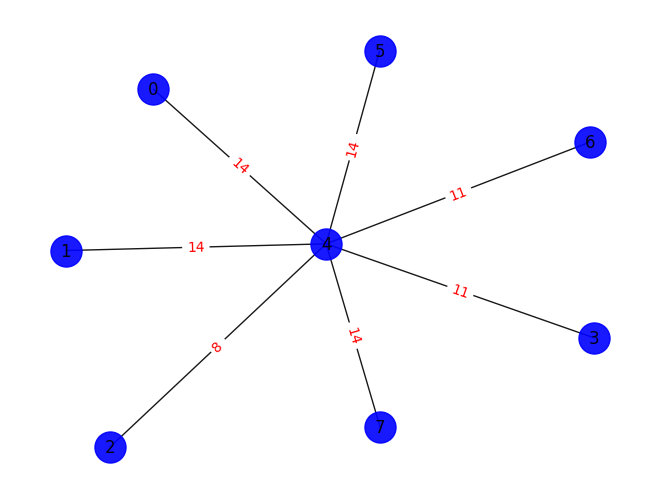

<Figure size 1000x600 with 0 Axes>

In [1468]:
plotar_rede(rd_virtual)

### Execultando algoritimo Genetico

In [1469]:
individuo = algoritimo_genetico(rd_fisica,rd_virtual)

### - Incorporando rede virtual na rede fisica

In [1470]:
nos_mapeados,enlaces_mapeados = consume_recursos(individuo[1],rd_fisica,rd_virtual)

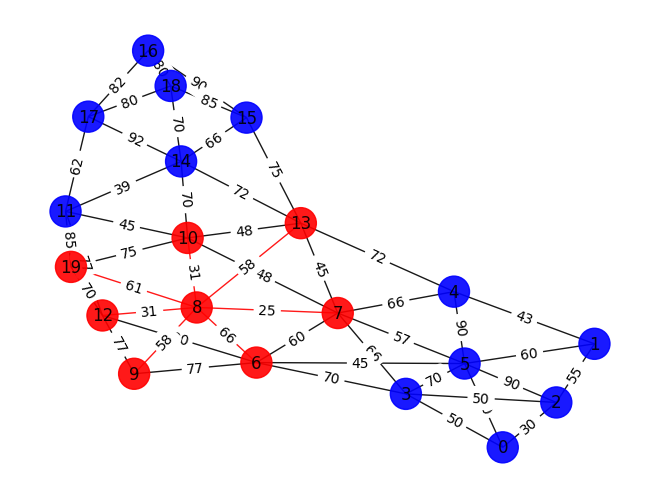

<Figure size 1000x600 with 0 Axes>

In [1471]:
plotar_rede_incorporada(rd_fisica,nos_mapeados,enlaces_mapeados)

### - Testando Algoritimo

### 2 - Criando uma rede virtual

In [1472]:
# Definição do grafo de topologia virtual a ser mapeado
rd_virtual = nx.Graph()

rd_virtual.add_nodes_from([
    (0, {"cpu": 15}),
    (1, {"cpu": 20}),
    (2, {"cpu": 25}),
    (3, {"cpu": 19}),
    ]
    
    )

rd_virtual.add_weighted_edges_from([(0, 1,14),(0,3,18),(0,2,12),
                                    (1, 2,15),(1,3,20),(2,3,20),])


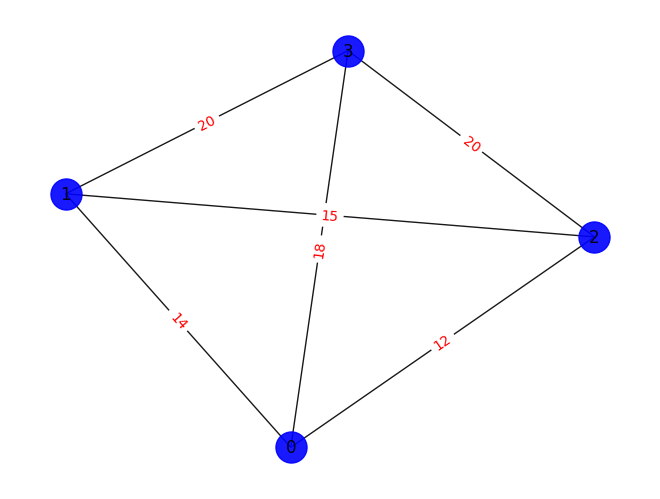

<Figure size 1000x600 with 0 Axes>

In [1473]:
plotar_rede(rd_virtual)

### Execultando algoritimo Genetico

In [1474]:
individuo = algoritimo_genetico(rd_fisica,rd_virtual)

### - Incorporando rede virtual na rede fisica

In [1475]:
nos_mapeados,enlaces_mapeados = consume_recursos(individuo[1],rd_fisica,rd_virtual)

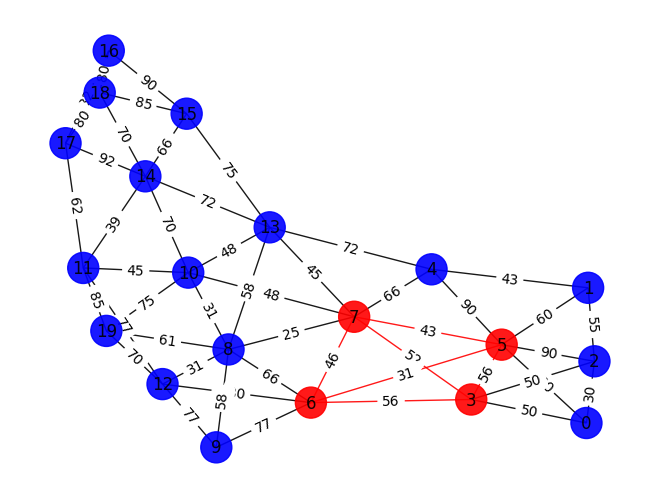

<Figure size 1000x600 with 0 Axes>

In [1476]:
plotar_rede_incorporada(rd_fisica,nos_mapeados,enlaces_mapeados)

### - Teste 2

In [1477]:
# Definição do grafo de topologia virtual a ser mapeado
rd_virtual = nx.Graph()

rd_virtual.add_nodes_from([
    (0, {"cpu": 5}),
    (1, {"cpu": 4}),
    (2, {"cpu": 5}),
    (3, {"cpu": 9}),
    ]
    
    )

rd_virtual.add_weighted_edges_from([(0, 1,10),(0,2,8),(2,3,12),
                                    (1, 3,10)])

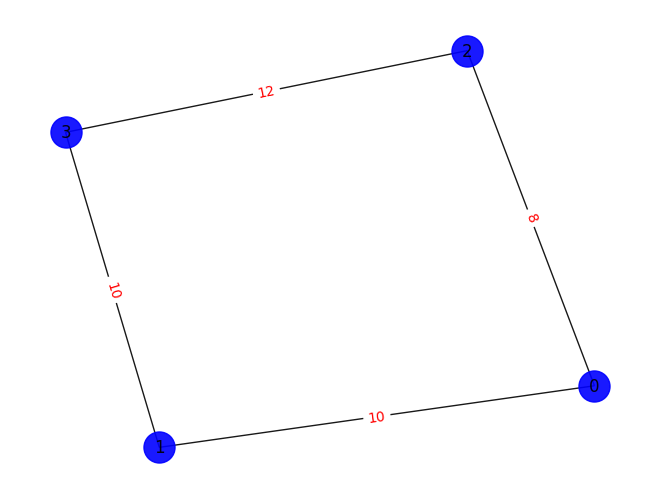

<Figure size 1000x600 with 0 Axes>

In [1478]:
plotar_rede(rd_virtual)

In [1479]:
i = algoritimo_genetico(rd_fisica,rd_virtual)

n,e = consume_recursos(i[1],rd_fisica,rd_virtual)

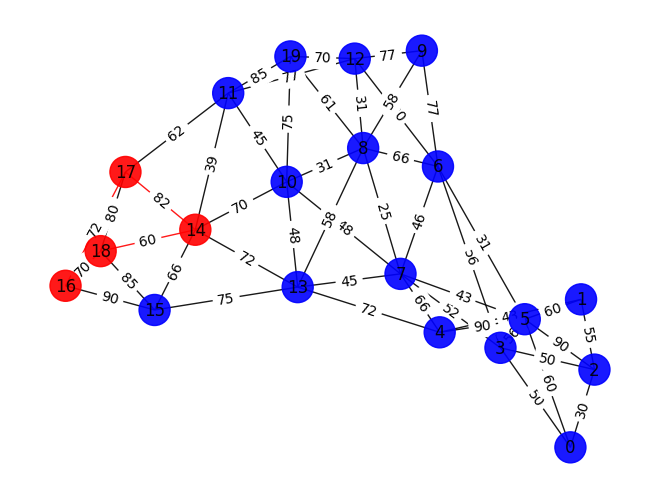

<Figure size 1000x600 with 0 Axes>

In [1480]:
plotar_rede_incorporada(rd_fisica,n,e)

### - Teste 3

In [1481]:
# Definição do grafo de topologia virtual a ser mapeado
rd_virtual = nx.Graph()

rd_virtual.add_nodes_from([
    (0, {"cpu": 100}),
    (1, {"cpu": 400}),
    (2, {"cpu": 800}),
    (3, {"cpu": 150}),
    ]
    
    )

rd_virtual.add_weighted_edges_from([(0, 1,100),(0,2,80),(2,3,120)])

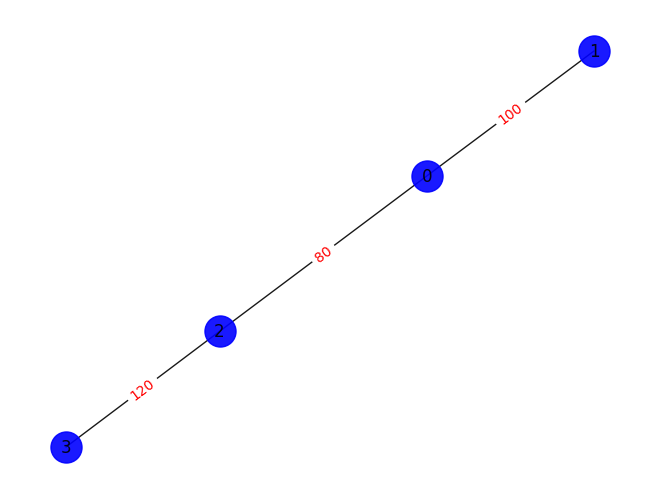

<Figure size 1000x600 with 0 Axes>

In [1482]:
plotar_rede(rd_virtual)

In [1483]:
i = algoritimo_genetico(rd_fisica,rd_virtual)

if i :
    n,e = consume_recursos(i[1],rd_fisica,rd_virtual)
else:
    print("Nao foi possivel mapear rede virtual")

Nao foi possivel mapear rede virtual


### - Teste 4

In [1484]:
# Definição do grafo de topologia virtual a ser mapeado
rd_virtual = nx.Graph()

rd_virtual.add_nodes_from([

    (0, {"cpu": 7}),
    (1, {"cpu": 6}),
    (2, {"cpu": 5}),
    (3, {"cpu": 8}),
    (4, {"cpu": 9}),

])

rd_virtual.add_weighted_edges_from([
    (0,1,4),(0,3,8),(0,2,11),
    (1,4,14),(1,2,9),(2,4,9),
    (2,3,10),(3,4,10),
    ]
)

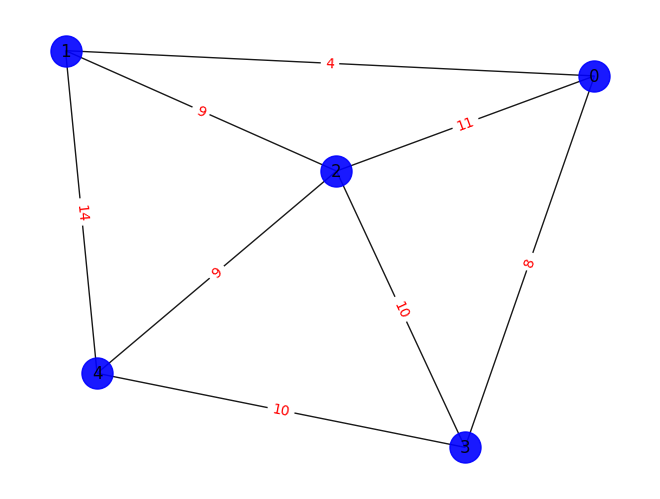

<Figure size 1000x600 with 0 Axes>

In [1485]:
plotar_rede(rd_virtual)

In [1486]:
i = algoritimo_genetico(rd_fisica,rd_virtual)

n,e = consume_recursos(i[1],rd_fisica,rd_virtual)

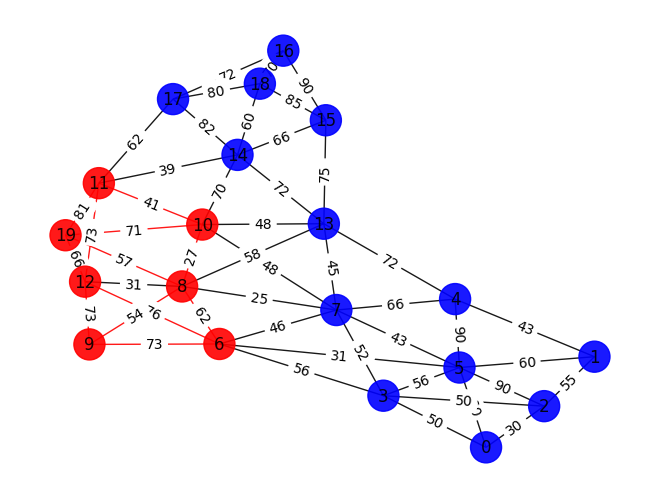

<Figure size 1000x600 with 0 Axes>

In [1487]:
plotar_rede_incorporada(rd_fisica,n,e)

### - Teste 5

In [1488]:
rd_virtual = nx.Graph()

rd_virtual.add_nodes_from([

    (0, {"cpu": 17}),
    (1, {"cpu": 16}),
    (2, {"cpu": 15}),
    (3, {"cpu": 18}),

    (4, {"cpu": 17}),
    (5, {"cpu": 16}),
    (6, {"cpu": 15}),
    (7, {"cpu": 18}),

])

rd_virtual.add_weighted_edges_from([
    (1,4,14),(2,4,8),(3,4,11),(5,4,14),
    (6,4,11),(7,4,14),(0,4,14)

    ]
)

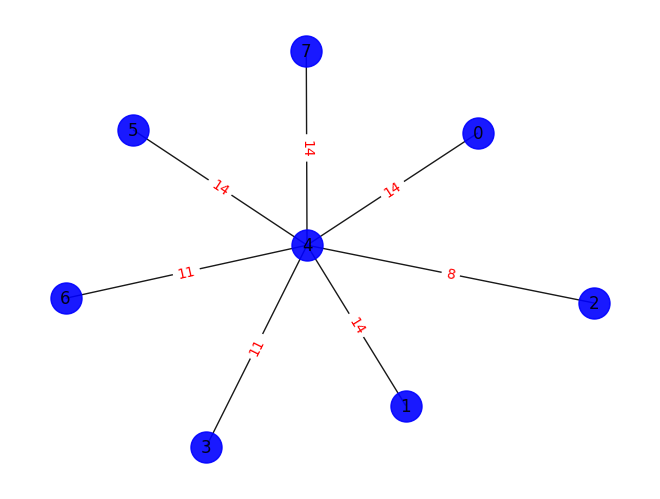

<Figure size 1000x600 with 0 Axes>

In [1489]:
plotar_rede(rd_virtual)

In [1490]:
i= algoritimo_genetico(rd_fisica,rd_virtual)

n,e = consume_recursos(i[1],rd_fisica,rd_virtual)

In [1491]:
i[0]

[0, 1, 18, 9, 5, 4, 3, 2]

In [1492]:
fitness(i[0],rd_fisica,rd_virtual)

-0.5399610136452242

In [1493]:
fitness([12, 10, 7, 19, 8, 9, 13, 6],rd_fisica,rd_virtual)

537.0

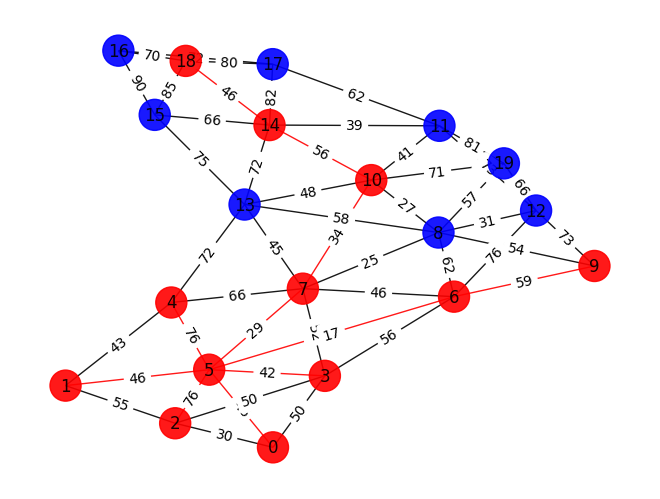

<Figure size 1000x600 with 0 Axes>

In [1494]:
plotar_rede_incorporada(rd_fisica,n,e)